In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv("SET C.csv")
X = df["Hours"].values.reshape(-1, 1)
y = df["Scores"].values
#Verify is data already import successfully
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [121]:
# Feature Scaling
mean_X = np.mean(X)
std_X = np.std(X)
X_scaled = (X - mean_X) / std_X
X_b = np.c_[np.ones(len(X_scaled)), X_scaled]

In [122]:
# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [123]:
# Gradient Descent function
def gradient_descent(X, y, alpha, iterations=1500):
    m = len(y)
    theta = np.zeros(2)
    cost_history = []
    
    for i in range(iterations):
        predictions = X @ theta
        errors = predictions - y
        gradients = (1/m) * X.T @ errors
        theta = theta - alpha * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
    
    return theta, cost_history

In [124]:
# === Run Gradient Descent with Different Learning Rates ===
learning_rates = [0.1, 0.001]
iterations = 1500
results = {}

print("Training with different learning rates...\n")
print("-" * 60)

for alpha in learning_rates:
    print(f"Running Gradient Descent with α = {alpha}...")
    theta, cost_history = gradient_descent(X_b, y, alpha, iterations)
    
    final_cost = cost_history[-1]
    print(f"α = {alpha} → Final Cost: {final_cost:.4f} | Final theta: [{theta[0]:.6f}, {theta[1]:.6f}]")
    
    # Convert back to original scale
    slope = theta[1] / std_X.item()
    intercept = theta[0] - slope * mean_X.item()
    
    print(f"     Model: Score = {intercept:.4f} + {slope:.4f} × Hours\n")
    
    results[alpha] = {
        'cost_history': cost_history,
        'theta': theta,
        'final_cost': final_cost,
        'intercept': intercept,
        'slope': slope
    }

print("-" * 60)

Training with different learning rates...

------------------------------------------------------------
Running Gradient Descent with α = 0.1...
α = 0.1 → Final Cost: 14.4414 | Final theta: [51.480000, 24.186088]
     Model: Score = 2.4837 + 9.7758 × Hours

Running Gradient Descent with α = 0.001...
α = 0.001 → Final Cost: 94.8551 | Final theta: [40.001877, 18.793491]
     Model: Score = 1.9299 + 7.5962 × Hours

------------------------------------------------------------


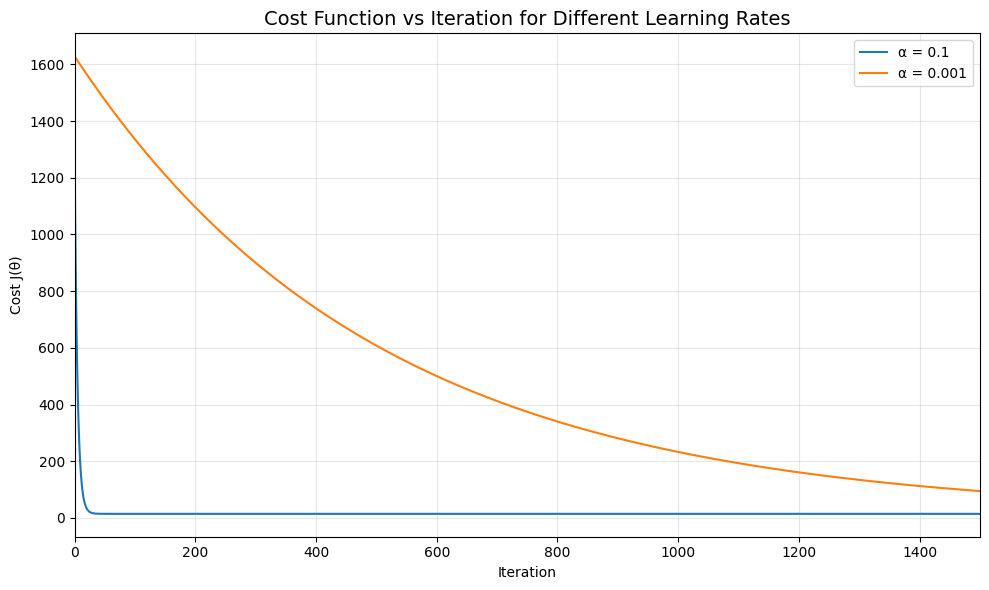

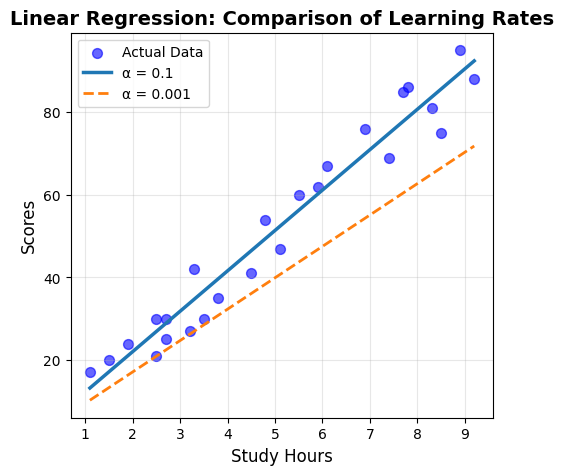

In [129]:
# === Plot Cost vs Iteration for All Learning Rates ===
plt.figure(figsize=(10, 6))
for alpha in learning_rates:
    plt.plot(results[alpha]['cost_history'], label=f'α = {alpha}')

plt.title('Cost Function vs Iteration for Different Learning Rates', fontsize=14)
plt.xlabel('Iteration')
plt.ylabel('Cost J(θ)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, iterations)


plt.tight_layout()
plt.show()\
    
# === Plot Regression Lines Comparison ===
plt.figure(figsize=(12, 5))

# Plot 1: Regression Lines
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', alpha=0.6, s=50, label='Actual Data')

for alpha in learning_rates:
    data = results[alpha]
    X_line = np.linspace(X.min(), X.max(), 100)
    y_pred = data['intercept'] + data['slope'] * X_line
    
    linestyle = '-' if alpha == 0.1 else '--'
    linewidth = 2.5 if alpha == 0.1 else 2
    plt.plot(X_line, y_pred, linewidth=linewidth, linestyle=linestyle,
             label=f"α = {alpha}")

plt.xlabel('Study Hours', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Linear Regression: Comparison of Learning Rates', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)


In [126]:
# === Final Comparison Table ===
print("FINAL SUMMARY TABLE")
print("-" * 80)
print(f"{'Learning Rate':<15} {'Final Cost':<15} {'Converged':<12} {'Model Equation'}")
print("-" * 80)
for alpha in learning_rates:
    data = results[alpha]
    converged = "Yes" if data['final_cost'] < 50 else "No (Diverged)" if alpha == 0.1 else "Very Slow"
    equation = f"y = {data['intercept']:.3f} + {data['slope']:.3f}x"
    print(f"{alpha:<15} {data['final_cost']:<15.4f} {converged:<12} {equation}")
print("-" * 80)

FINAL SUMMARY TABLE
--------------------------------------------------------------------------------
Learning Rate   Final Cost      Converged    Model Equation
--------------------------------------------------------------------------------
0.1             14.4414         Yes          y = 2.484 + 9.776x
0.001           94.8551         Very Slow    y = 1.930 + 7.596x
--------------------------------------------------------------------------------
